# Apprentisage non-supervisé:

Le but de ce TP est d'implémenter et tester les algorithmes vues en classes.

## Clustering hiérarchique:

On commence par implémenter le premier algorithme. Le bout de code suivant contient des fonctions qui vont être utilisées dans le reste du TP.

1.
Exécuter la cellule suivante.

2.
Lire les docstrings pour comprendre comment utiliser le fonctions.

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


def plot_points(points, ax, color):
    """
        Plots points.
        :param points: the points to plot
        :type points: iterable
        :param ax: the axis to plot in
        :type ax: matplotlib.axis
        :param color: the plotted points color
        :type color: str
    """
    ax.scatter(points[:, 0], points[:, 1], c=color)

    
def plot_dataset(X, Y, ax, **parameters):
    """
        Plots the dataset.
        :param X: the points to plot
        :type X: np.array
        :param Y: the points classes
        :type Y: np.array
        :param ax: the axis to plot in
        :type ax: matplotlib.axis
        :param colors: the plotted points colors depending on the class
        :type colors: iterable
    """
    for x, color in zip([X[Y==y] for y in set(Y)], parameters['colors']):
        plot_points(x, ax, color)


On génère un jeu de donner simple pour tester les algorithmes à implémenter.

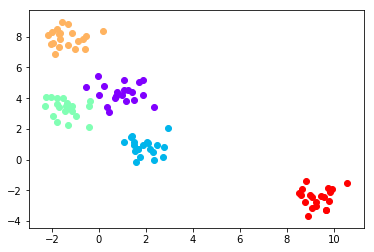

In [28]:
import sklearn.datasets

K_gt = 5
X, Y = sklearn.datasets.make_blobs(n_samples=100, centers=K_gt, random_state=0, cluster_std=.6)

# Plotting the ground truth
f, ax = plt.subplots(1, 1)
plot_dataset(X, Y, ax, colors=plt.cm.rainbow(np.linspace(0, 1, K_gt)))

#### Commentaire
* On peut remarquer que deux points rouges sont proches de l'amas violet. On peut suspecter que cela crée des inconsistances en phase de prédiction.
* Généralement, on n'a pas la vérité terrain: i.e. on ne connaît ni le nombre de classe ni les classes associées à chaques observations.

On présente, ci-dessous, les métrique à utiliser pour comparer les ensembles. Lancer ce bout de code pour comprendre comment utiliser ces fonctions.

In [14]:
def distances(A, B, metric):
    """
        Compute the list of all distances between elements from sets A and B based on the `metric' distance.
        :param A: the left hand operand
        :type A: set
        :param B: the right hand operand
        :type B: set
        :param metric: the distance to be used
        :type metric: callable
        :return: the distance
        :rtype: list
    """
    return [
            metric(a, b)
            for a in A
            for b in B
        ]
    

def minimum_metric(metric):
    """
        Compute the minimum distance between sets A and B based on the `metric' distance.
        :param metric: the distance to be used
        :type metric: callable
        :return: the distance
        :rtype: callable
    """
    return lambda A, B: min(distances(A, B, metric))


def maximum_metric(metric):
    """
        Compute the maximum distance between sets A and B based on the `metric' distance.
        :param metric: the distance to be used
        :type metric: callable
        :return: the distance
        :rtype: callable
    """
    return lambda A, B: max(distances(A, B, metric))


def mean_metric(metric):
    """
        Compute the mean distance between sets A and B based on the `metric' distance.
        :param metric: the distance to be used
        :type metric: callable
        :return: the distance
        :rtype: callable
    """
    return lambda A, B: sum(distances(A, B, metric)) / (len(A) * len(B))


def array2tuples(feats):
    """
        Transform an attributes matrix to a list of tuples which is hashable. This may be handy when it is necessary to have hashable data.
        :param feats: the feature matrix where lines are instances and columns are dimensions
        :type feats: np.array
        :return: the list of tuple representation.
        :rtype: list
    """
    return [tuple(x) for x in feats]


def tuples2array(tuples):
    """
        Transform a list of tuples to an attributes matrix.
        :param tuples: the list of tuple representations
        :type tuples: np.array
        :return: feature matrix where lines are instances and columns are dimensions
        :rtype: np.array
    """
    return np.array([list(x) for x in tuples])



print('Example:')
A = set(array2tuples(X[Y==0]))
print('A = ', A)
B = set(array2tuples(X[Y==1]))
print('B = ', B)
euclidian = lambda x, y: np.linalg.norm(np.array(x) - np.array(y))
print('\nOn utilise la distance Euclidienne: ', euclidian)
print('La distance minimale entre A et B est:', minimum_metric(euclidian)(A, B))
print('La distance maximale entre A et B est:', maximum_metric(euclidian)(A, B))
print('La distance moyenne entre A et B est:', mean_metric(euclidian)(A, B))

Example:
A =  {(1.4949317978621983, 3.858488315204525), (1.1641106995370358, 3.791329883867355), (-0.5555238109539522, 4.695958484712606), (1.8959376071615694, 5.185402589388561), (0.7675227889508035, 4.397596708910778), (1.2425880181937505, 4.50399192387295), (1.0037251889273626, 4.19147701743289), (1.4328927136346912, 4.376792337344087), (1.7144444869831275, 5.025215236719037), (0.00793137001172417, 4.1761431593200085), (1.0692385339646449, 4.530684839209695), (-0.04749203582851247, 5.474252564587464), (0.670478769495503, 4.0409427464816785), (1.8727175224410586, 4.180692369188909), (0.7438739881017237, 4.122405677103188), (1.0626962212430218, 5.176351431626175), (0.44359862996842747, 3.1153094465140336), (0.34713829950623953, 3.451776565141005), (2.3381228529390596, 3.431167922689131), (0.22459286251653932, 4.770281540947536)}
B =  {(1.5108885028029326, 0.9288308974156202), (1.5673797522062056, -0.13810590146106927), (1.5327892319237488, 0.5503538610792875), (1.6746742652242999, 0.6

2.
Implémenter les fonctions `minimal_couples`, `prune_minimizers` et `update_clustering` de clustering hiérarchique ascendant en complétant les fonctions présentées ci-dessous.

Iteration t = 1 --> 99 clusters
Iteration t = 2 --> 98 clusters
Iteration t = 3 --> 97 clusters
Iteration t = 4 --> 96 clusters
Iteration t = 5 --> 95 clusters
Iteration t = 6 --> 94 clusters
Iteration t = 7 --> 93 clusters
Iteration t = 8 --> 92 clusters
Iteration t = 9 --> 91 clusters
Iteration t = 10 --> 90 clusters
Iteration t = 11 --> 89 clusters
Iteration t = 12 --> 88 clusters
Iteration t = 13 --> 87 clusters
Iteration t = 14 --> 86 clusters
Iteration t = 15 --> 85 clusters
Iteration t = 16 --> 84 clusters
Iteration t = 17 --> 83 clusters
Iteration t = 18 --> 82 clusters
Iteration t = 19 --> 81 clusters
Iteration t = 20 --> 80 clusters
Iteration t = 21 --> 79 clusters
Iteration t = 22 --> 78 clusters
Iteration t = 23 --> 77 clusters
Iteration t = 24 --> 76 clusters
Iteration t = 25 --> 75 clusters
Iteration t = 26 --> 74 clusters
Iteration t = 27 --> 73 clusters
Iteration t = 28 --> 72 clusters
Iteration t = 29 --> 71 clusters
Iteration t = 30 --> 70 clusters
Iteration t = 31 --

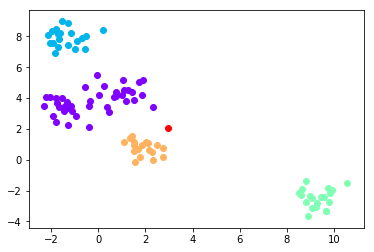

In [29]:
import functools, operator


def minimal_couples(P, group_metric):
    """
        Find the partition index couples that minimizes the `group_metric' over all couples from the partition S.
        :param P: the list of all sets forming the features partition.
        :type P: list
        :param group_metric: the metric to compare partitions
        :type group_metric: callable
        :return: the list of couples (s, l) minimizing (s, l) --> group_metric(P[s], P[l]).
        :rtype: list
    """
    # Hint: Use built-in python minimum function `min' on a list of tuples containing the couple (s, l) and the value group_metric(P[s], P[l])
    
    # Map all non redundant partion indexe couples and distances
    index_couple_distance_map = [
        (s, l, group_metric(p, q))
        for (s, p) in enumerate(P) # each set `p' in `P' has index `s'
        for (l, q) in enumerate(P)
        if s < l # For non redundancy + case s == l distance is always zero and not interesting to study
    ]
    _, _, min_distance = min(
        index_couple_distance_map,
        key=operator.itemgetter(-1) # Function that returns the last element of an iterable: That is what will be sorted
    )
    return [
        (s, l) 
        for s, l, distance in index_couple_distance_map
        if distance == min_distance
    ]


def prune_minimizers(couples):
    """
        Prune couples into a list of partition indexes to group.
        :param group_metric: the metric to compare partitions
        :type group_metric: callable
        :return: the list of sets of pruned couples.
        :rtype: list
    """
    # Hint: Use sets for unicity
    return [
        set.union(
            *[
                set(c_k)
                for c_k in couples
                if bool(set(c_k).intersection(set(c_i))) # Keep only c_k and c_i have a common element
            ]
        )
        for c_i in couples
    ]


def update_clustering(indexes_to_cluster, P):
    """
        Updates the partition based on the indexes of partitions to cluster.
        :param indexes_to_cluster: list of indexes of partition to cluster
        :type indexes_to_cluster: list
        :param P: the list of all sets forming the features partition.
        :type P: list
        :return: the new partition
        :rtype: list
    """
    # Group sets from partition `P' with indexes `indexes_to_cluster'
    Q = [
        set.union(
            *[
                P[index]
                for index in e_i
            ] # All sets to fuse
        )
        for e_i in indexes_to_cluster
    ]
    # Keep the rest unchanged
    Q += [
        P[index]
        for index in set(range(len(P))) - set.union(*indexes_to_cluster)
    ]
    return Q
    

def hierarchical_clustering(X, group_metric=minimum_metric(euclidian), T=100, K=3):
    """
        The hierarchical clustering algorithm.
        :param X: the feature matrix
        :type X: np.array
        :param group_metric: the metric to compare partitions
        :type group_metric: callable
        :param T: maximal iterations
        :type T: int
        :param K: wanted number of clusters
        :type K: int
        :return: The list of partitions per iteration
        :type: list
    """
    initial_partition = [set([x]) for x in array2tuples(X)]
    cl = len(initial_partition)
    S = [None] * (T + 1) # Do not append: it is very slow
    S[0] = initial_partition
    t = 0
    while t < T and cl > K:
        t += 1
        couples = minimal_couples(S[t-1], group_metric) # Minimal couples
        indexes_to_cluster = prune_minimizers(couples) # Minimal indexes grouped
        S[t] = update_clustering(indexes_to_cluster, S[t-1])
        cl = len(S[t])
        print('Iteration t =', t, '-->', cl, 'clusters')
    return S[:(t+1)] # return all not None partions

S = hierarchical_clustering(X, K=K_gt)

# Plotting the result
clusters = np.array(
    functools.reduce(
        operator.add,
        [[cls] * len(set_cls) for (cls, set_cls) in enumerate(S[-1])]
    )
)
H = np.concatenate([tuples2array(x) for x in S[-1]])
f, ax = plt.subplots(1, 1)
plot_dataset(H, clusters, ax, colors=plt.cm.rainbow(np.linspace(0,1,len(S[-1]))))

3.
Comparer les résultats à la vérité terrain.

4.
Essayer plusieurs valeurs de K et de deviation standard de données d'entrées. Commenter les résultats.

#### Commentaire:

* Comme suspecté, les deux points rouges proches de l'amas violet dans la vérité terrain ont été confondues dans ce dernier.
* Le résultat de l'algorithme est bien déterministe: même si relancé plusieurs fois, le résultat restent inchangé.
* Le choix de métrique d'ensemble joue un rôle important comme quand on choisit la métrique $D_m$ qui donnent une solution loin de la vérité terrain.

## K-moyennes:

5.
Compléter les fonctions suivantes pour implémenter l'algorithme K-moyenne.

The minimum intravariance inertia is: 66.94362783460733


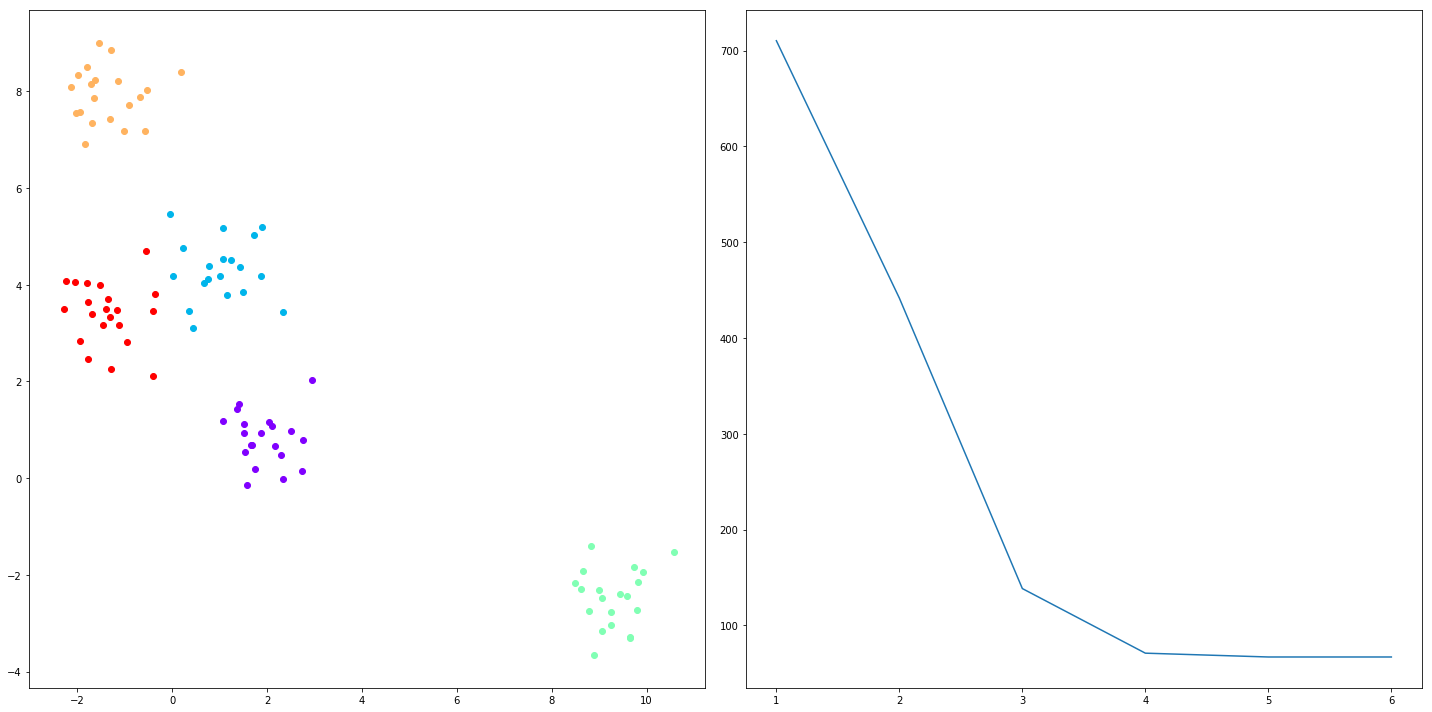

In [21]:
import random


def read_image(filename):
    return skimage.io.imread(filename)


def sample(X, K):
    """
        Sample `K' instances from X.
        :param X: the feature matrix
        :type X: np.array
        :param K: wanted number of clusters
        :type K: int
        :return: The map of clusters and their sampled index
        :type: dict
    """
    return dict(
        enumerate(
            random.sample(
                range(len(X)),
                K
            )
        )
    )


def diff(centers, t, metric=euclidian):
    """
        Compute the change in centers at time t.
        :param centers: the centers 
        :type centers: np.array
        :param t: the iteration
        :type t: int
        :return: The differences per cluster in an array
        :type: np.array
    """
    return sum(
        [
            metric(after, before)
            for after, before
            in zip(centers[t], centers[t-1])
        ]
    )


def assign(X, mus, metric=euclidian):
    """
        Assign each instance the cluster of the closest center in mus.
        :param X: the feature matrix
        :type X: np.array
        :param mus: the list of centers
        :type mus: list
        :return: The map of clusters and correponding instance indices
        :type: dict
    """
    # Compute the closest cluster for each instance
    index_cluster_map = {
        index: 
        min(
            [
                (k, metric(x, mu))
                for k, mu in enumerate(mus)
            ],
            key=operator.itemgetter(-1) # chooses the last element: the distance between `x' and `mu' to minimize
        )[0] # the index of the closest center
        for index, x in enumerate(X)
    }
    return {
        k: [
            index
            for index, k_index in index_cluster_map.items()
            if k == k_index
        ] # To fill: This is the list of indices of all instances in cluster k
        for k, mu in enumerate(mus)
    } 


def update_centers(indices_map, X):
    """
        Update partition centers
        :param X: the feature matrix
        :type X: np.array
        :param indices_map: map of cluster indices
        :type indices_map: dict
        :return: partion centers
        :type: list
    """
    return [
        np.mean(X[indices_map[k]], axis=0)
        for k in sorted(indices_map)
    ]


def compute_intravariance(X, mus, indices_map, metric=euclidian):
    """
        Compute Iw for the partition.
        :param X: the feature matrix
        :type X: np.array
        :param mus: the list of centers
        :type mus: list
        :param indices_map: map of cluster indices
        :type indices_map: dict
        :return: Inertia intraclasse
        :type: float
    """
    return sum(
        [
            sum(
                [
                    pow(metric(x, mu), 2)
                    for x in X[indices_map[k]]
                ]
            )
            for k, mu in enumerate(mus)
        ]
    )
    
    
def k_means(X, metric=euclidian, T=100, K=3, epsilon=0):
    """
        The hierarchical clustering algorithm.
        :param X: the feature matrix
        :type X: np.array
        :param metric: the metric to apply on the attribute space
        :type metric: callable
        :param T: maximal iterations
        :type T: int
        :param K: wanted number of clusters
        :type K: int
        :return: couple of map of clusters and corresponding instances and the values taken by Iw
        :type: tuple
    """
    indices_map = sample(X, K)
    t = 0
    centers = [None] * (T + 1)
    Iw = [None] * (T + 1)
    centers[0] = list(X[list(indices_map.values())])
    Iw[0] = float('Inf')
    while True: # Emulates do ... while in python
        t += 1
        indices_map = assign(X, centers[t-1], metric)
        centers[t] = update_centers(indices_map, X)
        Iw[t] = compute_intravariance(X, centers[t], indices_map, metric)
        if t >= T or diff(centers, t, metric) <= epsilon:
            break
    centers = [mus for mus in centers if mus is not None]
    Iw = Iw[:len(centers)]
    return (
        {k: X[[indices]] for k, indices in indices_map.items()},
        Iw[:(t + 1)],
        centers[:(t + 1)]
    )

cluster_maps, Iw, centers = k_means(X, K=K_gt)
print('The minimum intravariance inertia is:', Iw[-1])

# Plotting the result
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(10)
f.set_figwidth(20)

clusters = np.array(
    np.array(
        functools.reduce(
            operator.add,
            [[k] * set_k.shape[0] for (k, set_k) in cluster_maps.items()]
        )
    )
)
M = np.concatenate(
    [
        set_k
        for (k, set_k) in cluster_maps.items()
    ]
)

plot_dataset(M, clusters, ax1, colors=plt.cm.rainbow(np.linspace(0,1,len(S[-1]))))

# plot Iw
ax2.plot(range(len(Iw)), Iw)

plt.tight_layout()
plt.show()

6.

    a. Comparer le résultat de K-moyenne avec différentes initialisations. Commenter.

    b. Commenter la courbe d'inertie avec différentes initialisations.

#### Commentaire

* Le K-means (K-moyennes) est bien probabiliste: selon l'initialisation, on peut avoir des résultats différents.
* Dans tous les cas, le K-means ne réussit pas à séparer les deux points rouges problématiques de l'amas violet (dans le sens de la vérité terrain).
* Le K-means demande moins d'itérations que le clustering hiérarchiques.
* L'inertie intraclasse dans ces expériences arrivent toujours à converger.
* L'inertie intraclasse ne converge pas forcément au même minimum (ce sont des minima locaux).
* Il faut réinitialiser, et donc relancer plusieur fois, le K-means pour s'assurer d'avoir trouver une solution satisfaisante.

7.
Essayer plusieurs valeurs de K et de deviation standard de données d'entrées. Commenter les résultats.

#### Commentaire

* Avec `K_gt = 5` on remarque que le K-means demande plus d'expérimentations pour tomber sur une bonne solution.